In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'

#suffix = 'ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p97_Theta70'
suffix = 'ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p955_Theta70_ABCDscan'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

In [5]:
#sig_histo2 = util.load(f'{prefix}/signal_BDT_ABCD_goodvtx_v10_NJetG0L3_OSSF.coffea')[0]

## Signal

In [5]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [6]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'Leading jet pT > 80 GeV',
 'Leading jet |eta| < 2.4',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'OSSF',
 'theta < 70',
 'BDT']

In [7]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [8]:
table = eff_cutflow
table.columns = cutnames

In [9]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [10]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [11]:
table = cts_cutflow
table.columns = cutnames

In [12]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,44.1691,27.5180,27.4900,26.5657,26.5657,26.2251,25.5668,21.3732,11.0380
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,"1,156.9315",666.7773,666.1743,642.8489,642.8489,635.0341,617.6829,546.6917,328.4849
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,"1,457.7156",827.0445,825.9792,797.3672,797.3672,787.3198,767.1020,689.5404,428.4679
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,74.7132,45.9089,45.8901,44.1806,44.1744,43.5820,42.4655,37.1571,22.1160
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,"1,964.2733","1,102.7526","1,102.0333","1,064.7355","1,064.7355","1,050.8564","1,018.2555",934.1113,596.4287
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,"2,725.2304","1,478.2941","1,477.9960","1,424.9048","1,424.9048","1,406.4192","1,361.3700","1,261.7544",837.1096
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,"1,620.1785",714.5297,714.5297,687.9354,687.9354,680.3314,656.2454,629.6533,449.7650
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"33,765.0692","11,685.7826","11,685.7826","11,173.1411","11,173.1411","10,978.4487","10,359.8293","9,688.3497","5,692.3645"
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,167.4818,107.2824,107.2824,103.1451,103.1451,102.3719,99.0149,92.0322,63.8445
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,"4,184.6540","2,237.3733","2,234.0401","2,160.7601","2,160.7601","2,126.5131","2,065.1446","1,939.5322","1,364.2676"


In [13]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [14]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [15]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [16]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


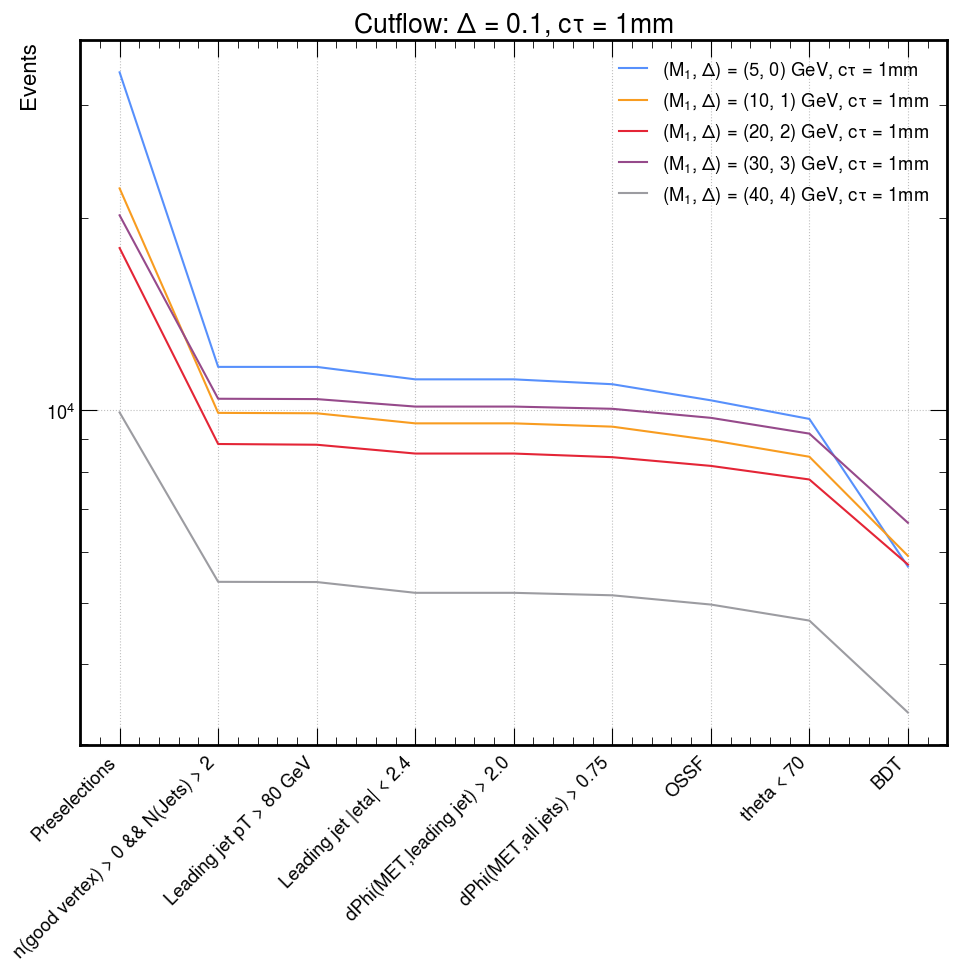

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


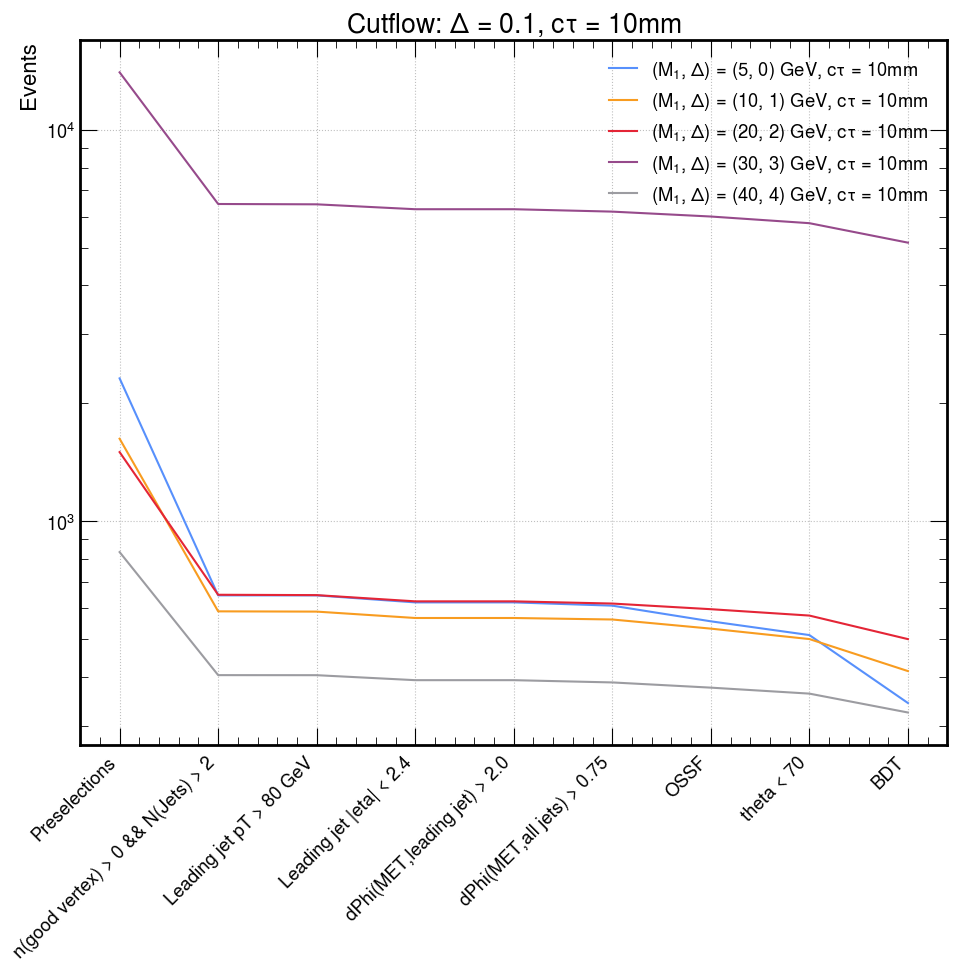

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


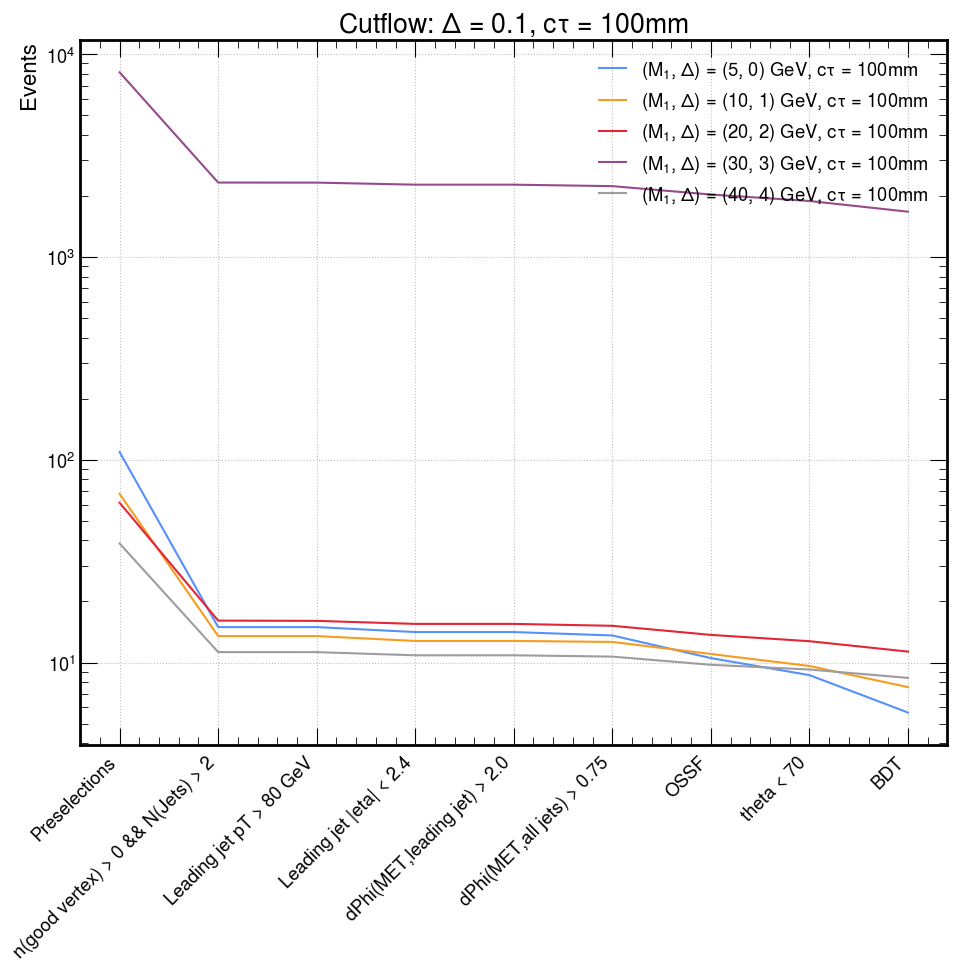

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


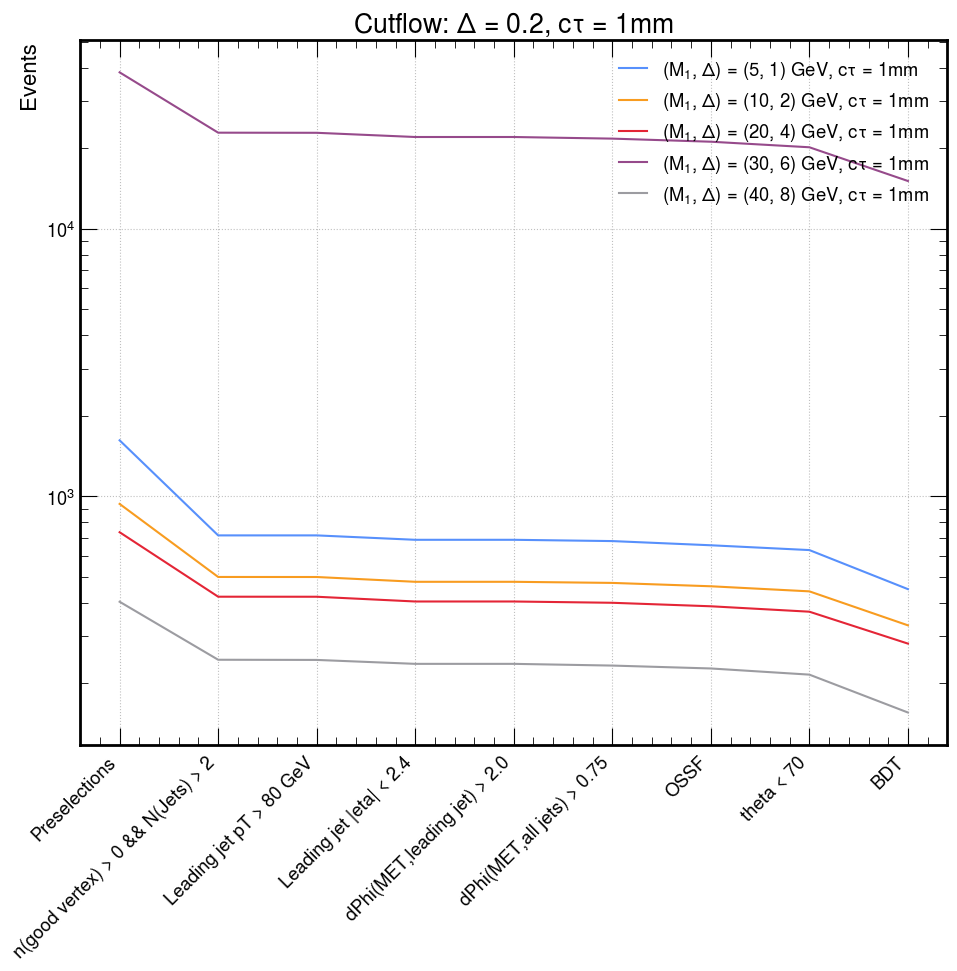

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


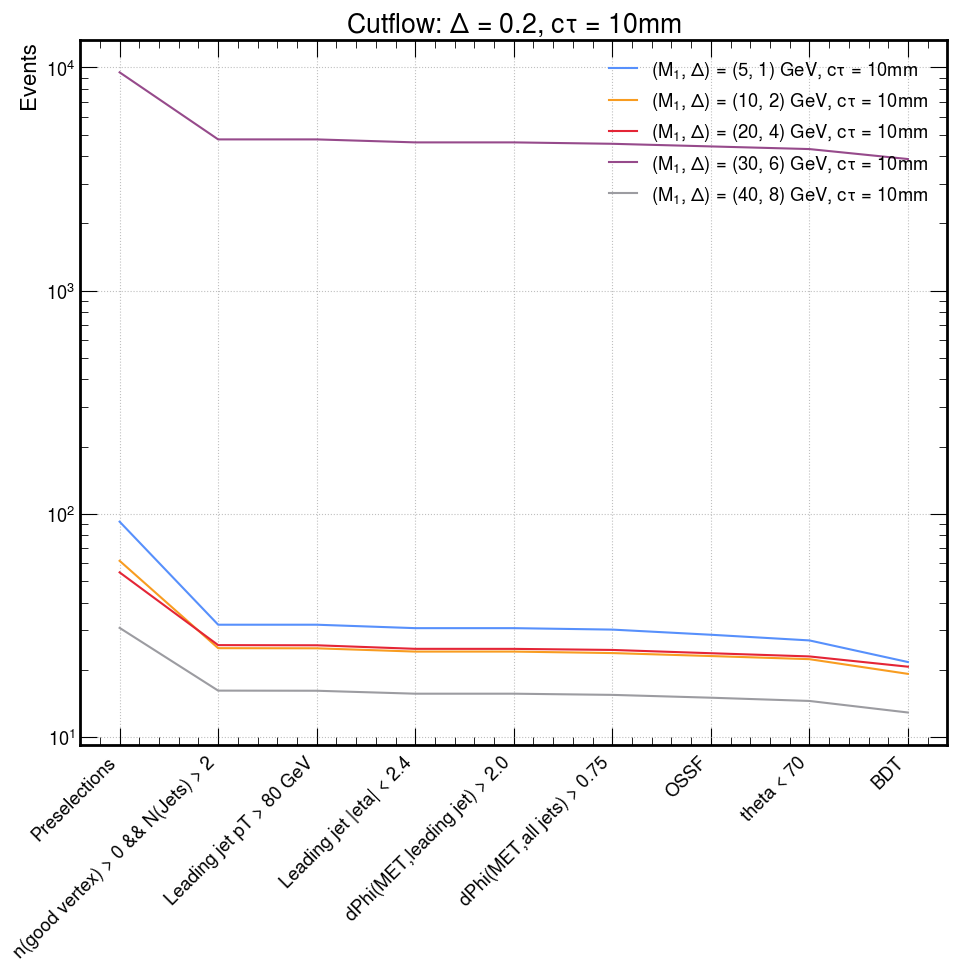

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


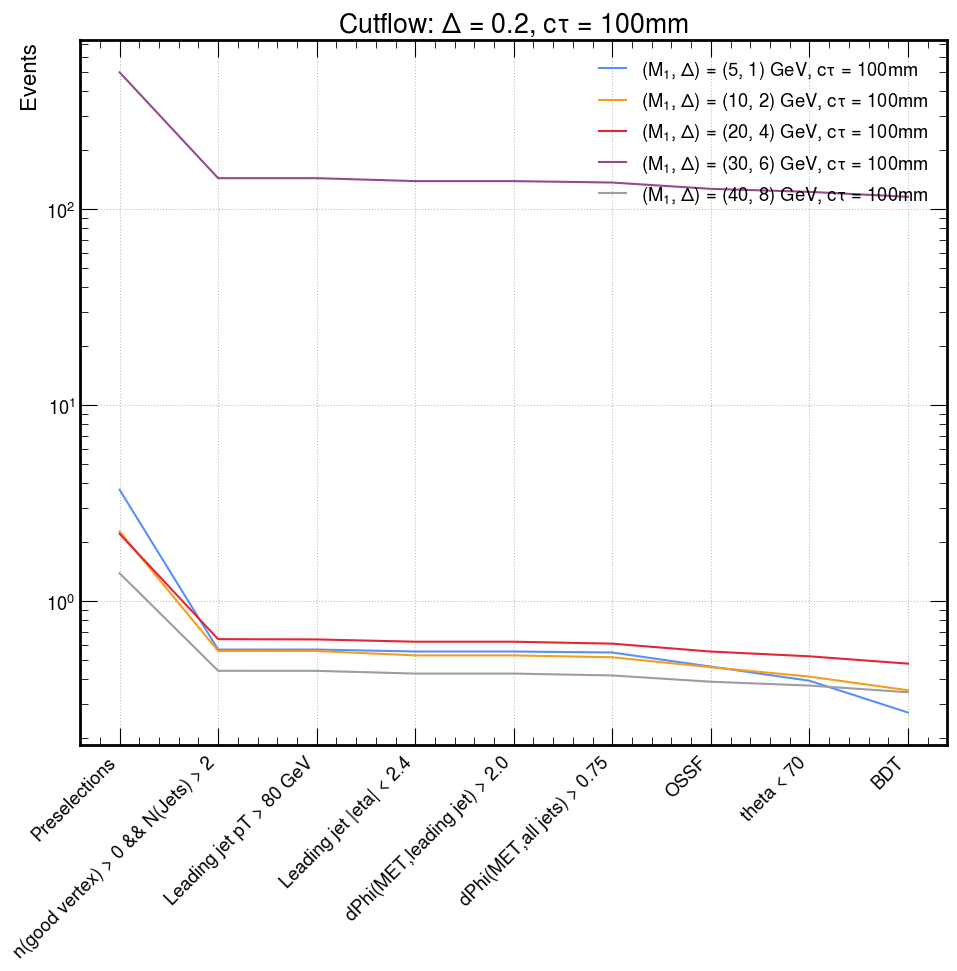

In [17]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


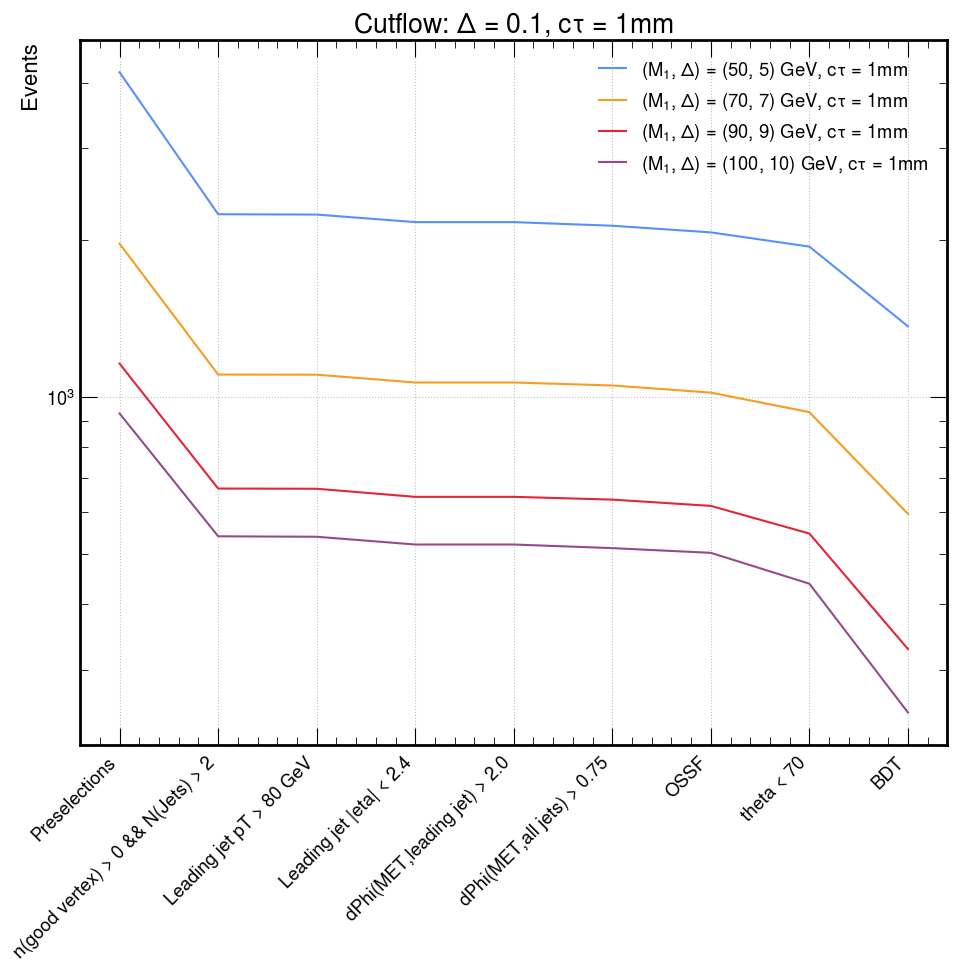

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


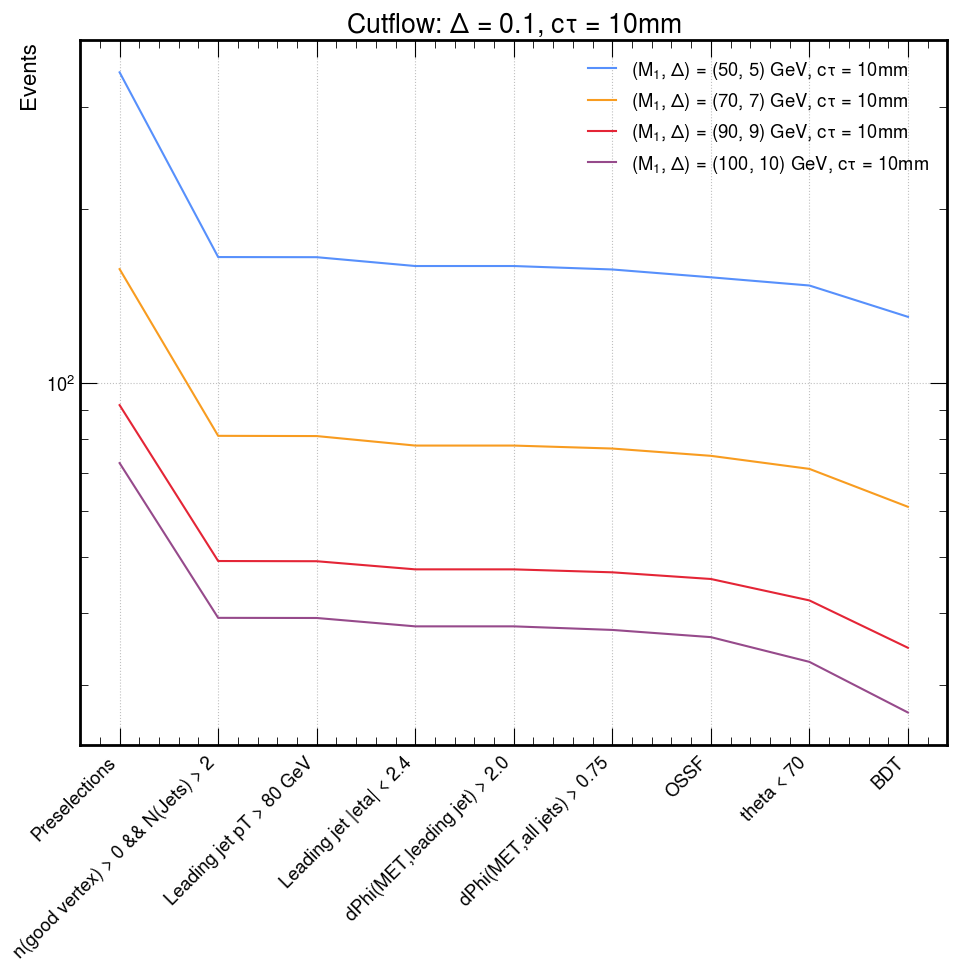

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


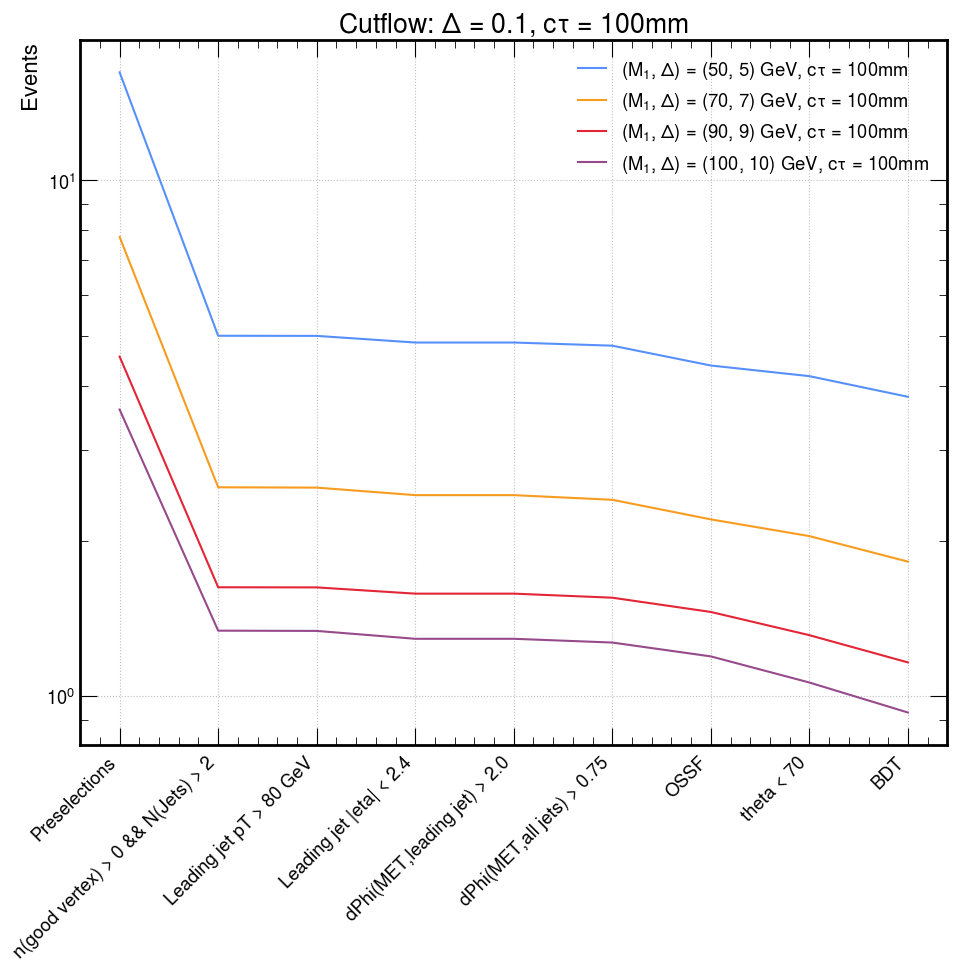

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


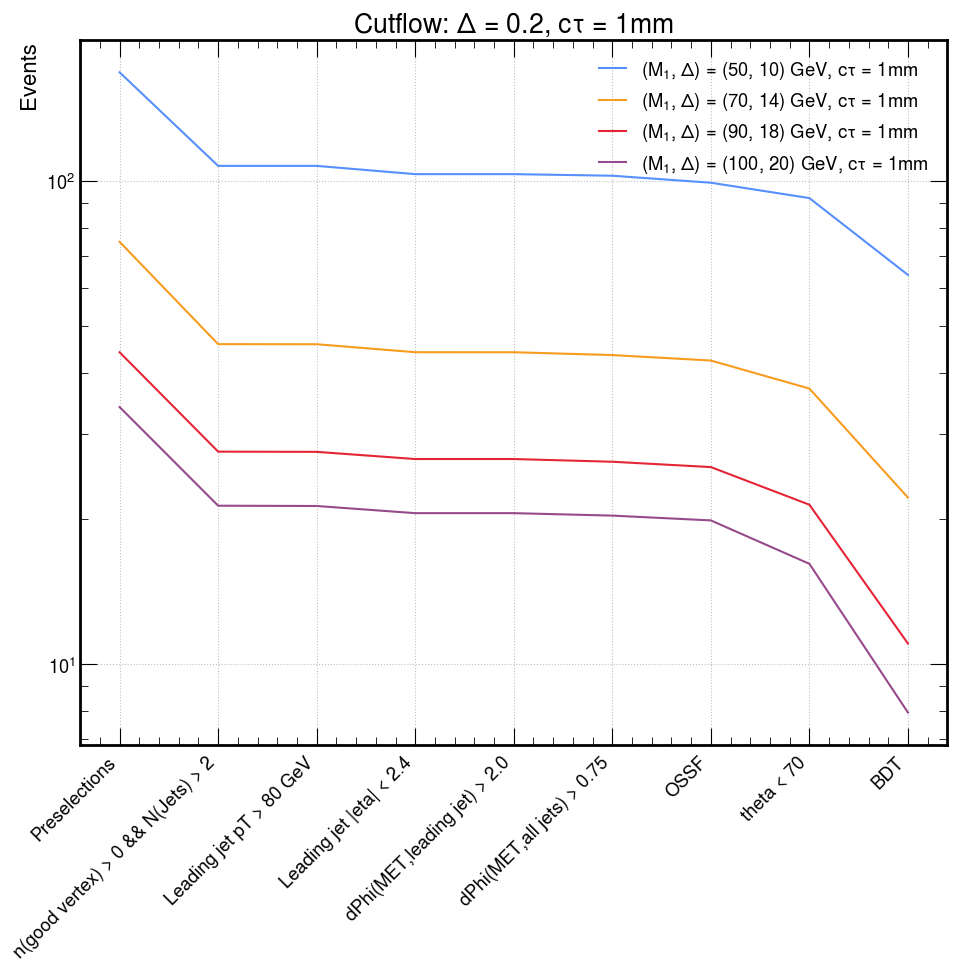

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


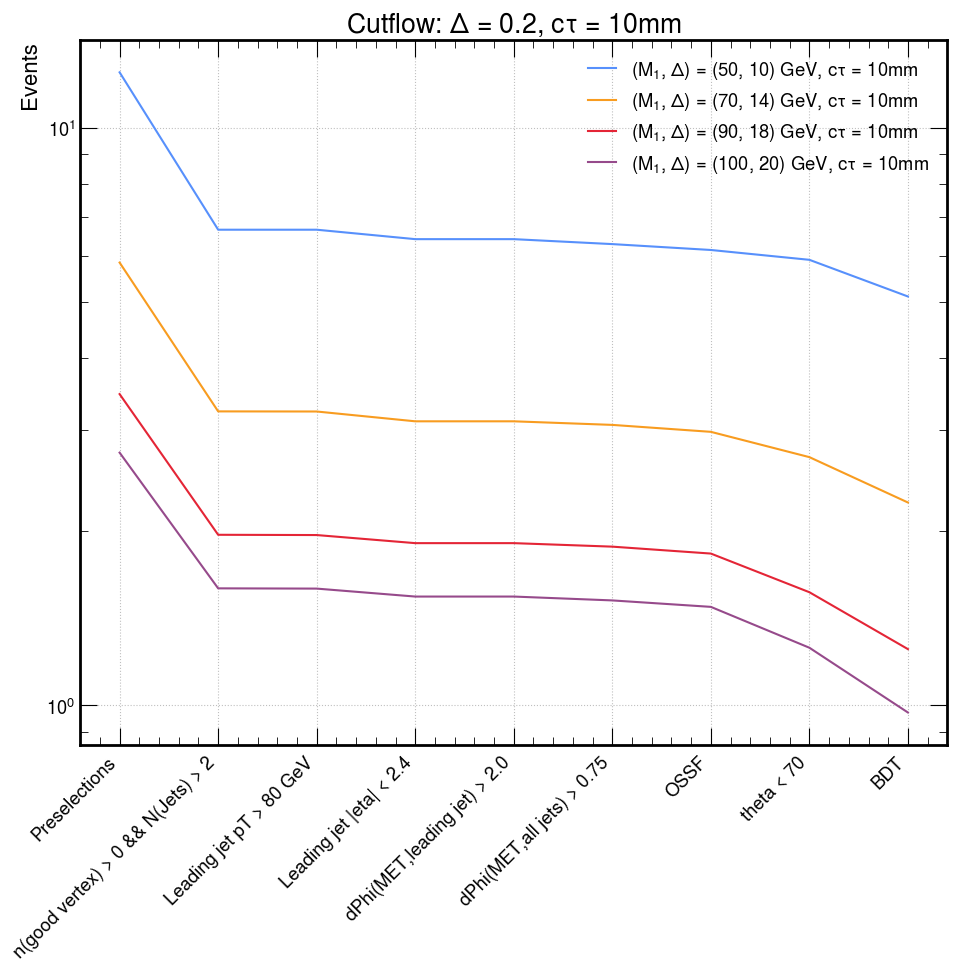

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'Leading jet pT > 80 GeV', 'Leading jet |eta| < 2.4', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'OSSF', 'theta < 70', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


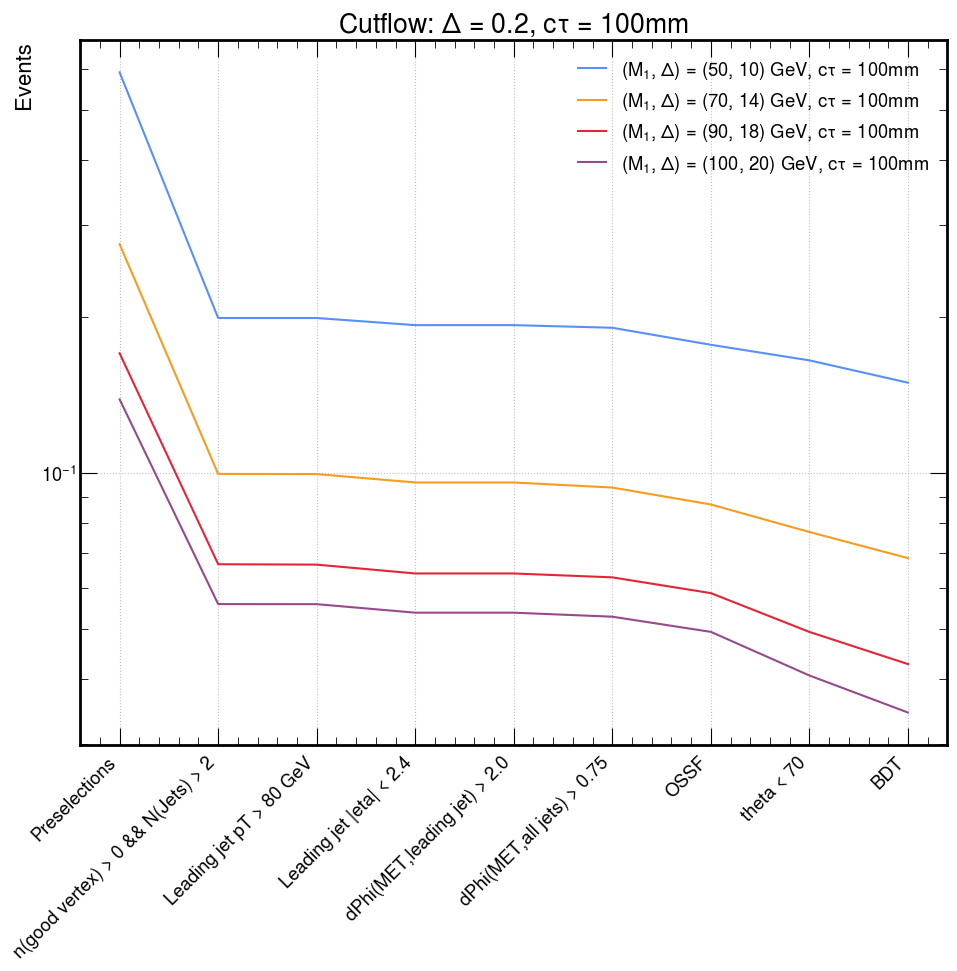

In [18]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Signal purity

In [ ]:
purity_v11 = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched')

In [ ]:
purity_v11_reco = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_vtx_matched_fromReco')

In [ ]:
purity_v10 = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched')

In [ ]:
purity_v10_reco = utils.get_signal_cutflow_dict(sig_histo2, 'cutflow_vtx_matched_fromReco')

In [ ]:
ct = 10
delta = 0.2

In [ ]:
table = purity_v11

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [ ]:
table = purity_v10

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [ ]:
plt.plot(m_list, purity_v10_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')


plt.grid()
plt.ylim([0.5,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(All events after the cut)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

In [ ]:
table = purity_v11_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v11_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v11_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [ ]:
table = purity_v10_reco

points = ((si["ctau"] == ct) & (si['delta'] == delta))

df = table.loc[list(si[points].name)]
df = utils.add_signal_info_to_df(df)

purity_v10_reco_beforeOSSF = df['dPhi(MET,all jets) > 0.75'].to_list()
purity_v10_reco_afterOSSF = df['OSSF'].to_list()
m_list = df['m1'].to_list()

In [ ]:
plt.plot(m_list, purity_v10_reco_beforeOSSF, '-', color='blue', label='With OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_beforeOSSF, '-', color='red', label='Without OSSF in good_vtx def.')
plt.plot(m_list, purity_v11_reco_afterOSSF, 'o', color='red', label='Without OSSF in good_vtx def. + OSSF cut in SR')

plt.grid()
plt.ylim([0.8,1.01])

plt.xlabel('M1 [GeV]')
plt.ylabel('Purity = (Selected Vertex is True Vertex)/(Events with ee reconstructed)')

plt.legend()

plt.title(rf"$\Delta$={delta}, {ct}mm")

## Background

In [19]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
Multiboson,0.00065832,0.00003441,0.00003004,0.00002763,0.00002678,0.00002517,0.00001774,0.00000721,0.00000000
ZGamma,0.00032468,0.00001653,0.00001398,0.00001313,0.00001310,0.00001314,0.00000881,0.00000478,0.00000000
Top,0.00039885,0.00001298,0.00001210,0.00001090,0.00001077,0.00000985,0.00000627,0.00000294,0.00000006
WJets,0.00101318,0.00003720,0.00003665,0.00003480,0.00003459,0.00003180,0.00001672,0.00000771,0.00000012
DY,0.00018701,0.00001151,0.00001141,0.00001094,0.00001083,0.00000952,0.00000760,0.00000367,0.00000011
ZJets,0.00242159,0.00007613,0.00007541,0.00007141,0.00007118,0.00006654,0.00003517,0.00001608,0.00000036
QCD,0.00000249,0.00000001,0.00000001,0.00000001,0.00000001,0.00000000,0.00000000,0.00000000,0.00000000
Total,0.00001696,0.00000054,0.00000052,0.00000049,0.00000049,0.00000044,0.00000024,0.00000011,0.00000000


In [20]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p955_Theta70_ABCDscan/Cutflow/Efficiency//Background_Efficiency.csv


In [21]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
Multiboson,"4,588.16",239.80,209.34,192.59,186.67,175.45,123.66,50.25,0.00
ZGamma,"1,665.13",84.77,71.71,67.31,67.20,67.41,45.16,24.51,0.00
Top,"26,174.93",851.60,793.75,715.64,706.97,646.17,411.66,192.83,3.98
WJets,"214,692.24","7,883.42","7,765.40","7,373.78","7,330.01","6,739.24","3,542.39","1,633.62",25.38
DY,"5,819.49",358.21,355.08,340.58,337.02,296.39,236.56,114.17,3.28
ZJets,"63,745.58","2,003.91","1,985.06","1,879.87","1,873.73","1,751.69",925.74,423.19,9.38
QCD,"53,432.27",275.55,275.55,214.93,206.03,32.90,16.05,0.00,0.00
Total,"370,117.80","11,697.26","11,455.88","10,784.71","10,707.63","9,709.25","5,301.23","2,438.56",42.02


In [22]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p955_Theta70_ABCDscan/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [23]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

,Preselections,n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
Multiboson,25187,1310,1106,1027,966,905,641,254,0
ZGamma,6506,343,307,292,279,252,158,75,0
Top,703976,21950,20178,18131,17729,16114,10382,4845,86
WJets,1177020,21199,20944,20158,19793,16850,8815,4106,64
DY,296131,7134,7103,6985,6640,4563,3734,1802,48
ZJets,738994,12563,12452,11965,11824,10144,5327,2436,57
QCD,31490,92,92,90,88,6,2,0,0
Total,2979304,64591,62182,58648,57319,48834,29059,13518,255


In [24]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

,Preselections,n(jet) > 2 && n(good vertex) > 0,Leading jet pT > 80 GeV,Leading jet |eta| < 2.4,"dPhi(MET,leading jet) > 2.0","dPhi(MET,all jets) > 0.75",OSSF,theta < 70,BDT
Multiboson,25187,1310,1106,1027,966,905,641,254,0
ZGamma,6506,343,307,292,279,252,158,75,0
Top,703976,21950,20178,18131,17729,16114,10382,4845,86
WJets,1177020,21199,20944,20158,19793,16850,8815,4106,64
DY,296131,7134,7103,6985,6640,4563,3734,1802,48
ZJets,738994,12563,12452,11965,11824,10144,5327,2436,57
QCD,31490,92,92,90,88,6,2,0,0
Total,2979304,64591,62182,58648,57319,48834,29059,13518,255


In [25]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p955_Theta70_ABCDscan/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [26]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 42.02


In [27]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Multiboson,ZGamma,Top,WJets,DY,ZJets,QCD,Total
Weighted Counts,0.00,0.00,3.98,25.38,3.28,9.38,0.00,42.02
Raw Counts,0.00,0.00,86.00,64.00,48.00,57.00,0.00,255.00


In [28]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-3]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-3]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

,Multiboson,ZGamma,Top,WJets,DY,ZJets,QCD,Total
Weighted Counts,123.66,45.16,411.66,"3,542.39",236.56,925.74,16.05,"5,301.23"
Raw Counts,641.00,158.00,"10,382.00","8,815.00","3,734.00","5,327.00",2.00,"29,059.00"


Saved: ./plots/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p955_Theta70_ABCDscan/cutflow//Cutflow_background.png


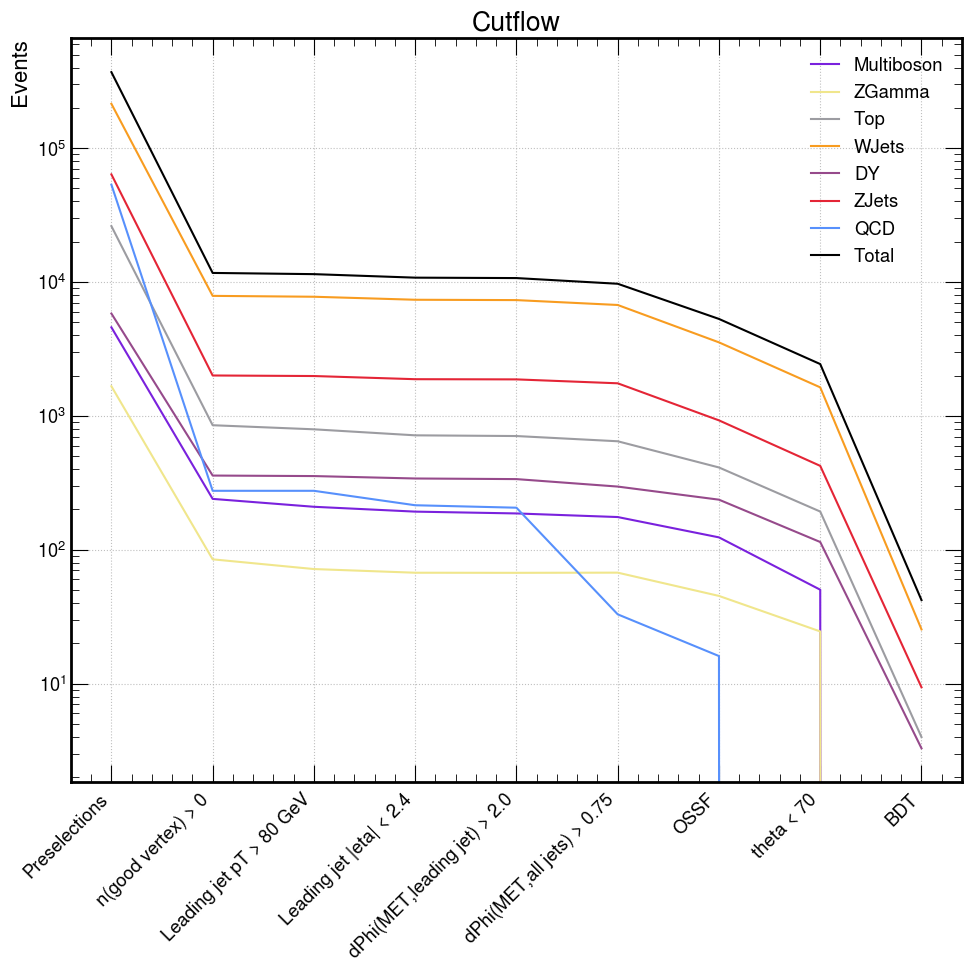

In [29]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

Saved: ./plots/ABCD_goodvtx_v11_NJetG0L3_OSSF_BDT0p955_Theta70_ABCDscan/cutflow//Cutflow_background.png


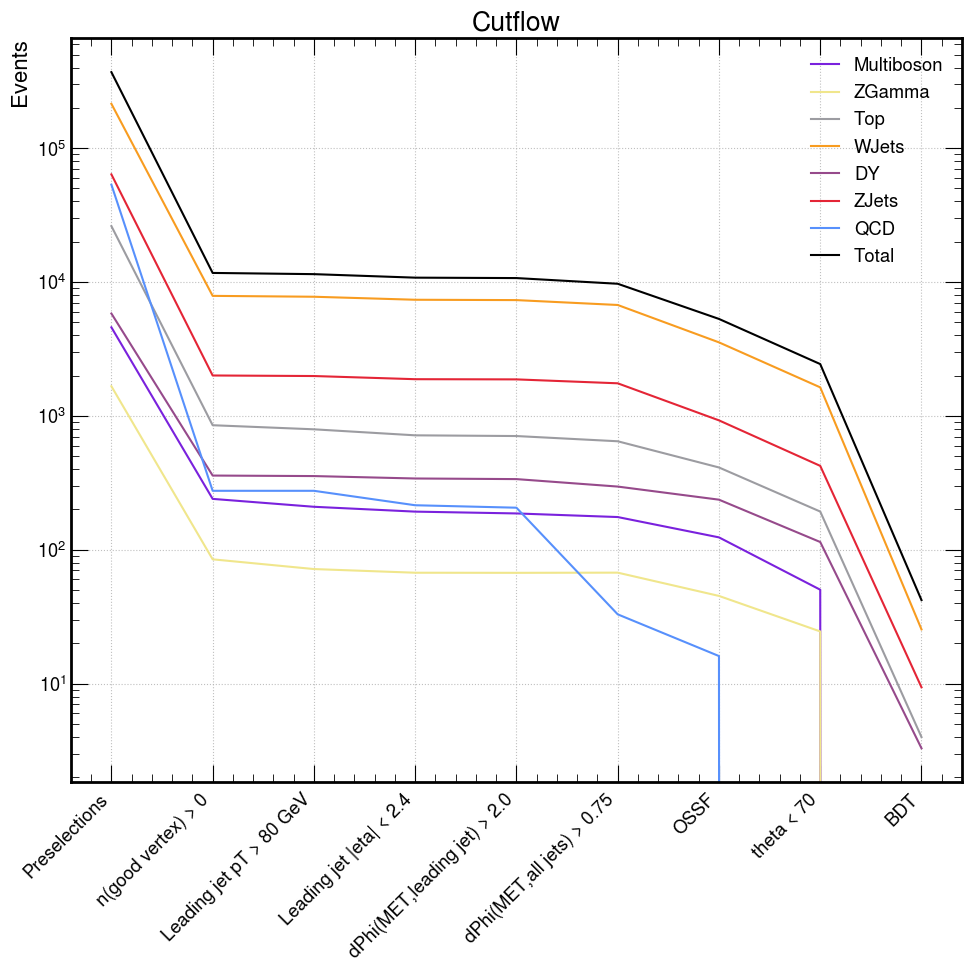

In [30]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

## S/B

In [40]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

42.02190779201609

In [41]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [42]:
pd.options.display.float_format = '{:,.4f}'.format


In [43]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

,BDT,m1,delta,ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,343.9048,5.0000,0.1000,10.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,"5,692.3645",5.0000,0.1000,1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.6683,5.0000,0.1000,100.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,449.7650,5.0000,0.2000,1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,21.6563,5.0000,0.2000,10.0000
...,...,...,...,...
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100,0.9286,100.0000,0.1000,100.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,0.9710,100.0000,0.2000,10.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,248.1908,100.0000,0.1000,1.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,0.0345,100.0000,0.2000,100.0000


In [44]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [45]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0000,0.1000,10.0000,343.9048,42.0219,53.0518
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0000,0.1000,1.0000,"5,692.3645",42.0219,878.1219
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0000,0.1000,100.0000,5.6683,42.0219,0.8744
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0000,0.2000,1.0000,449.7650,42.0219,69.3822
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0000,0.2000,10.0000,21.6563,42.0219,3.3408
...,...,...,...,...,...,...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10,100.0000,0.2000,10.0000,0.9710,42.0219,0.1498
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1,100.0000,0.1000,1.0000,248.1908,42.0219,38.2867
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100,100.0000,0.2000,100.0000,0.0345,42.0219,0.0053
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10,100.0000,0.1000,10.0000,26.9375,42.0219,4.1555


In [46]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


In [47]:
ct = 1.0


In [48]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1,5.0,0.1,1.0,"5,692.3645",42.0219,878.1219
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1,10.0,0.1,1.0,"5,916.6123",42.0219,912.7151
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1,20.0,0.1,1.0,"5,734.1060",42.0219,884.5611
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1,30.0,0.1,1.0,"6,664.5166",42.0219,"1,028.0891"
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1,40.0,0.1,1.0,"3,364.7652",42.0219,519.0592
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1,50.0,0.1,1.0,"1,364.2676",42.0219,210.4562
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1,60.0,0.1,1.0,837.1096,42.0219,129.1351
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1,70.0,0.1,1.0,596.4287,42.0219,92.0069
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1,80.0,0.1,1.0,428.4679,42.0219,66.0968
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1,90.0,0.1,1.0,328.4849,42.0219,50.6731


In [49]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1,5.0,0.2,1.0,449.7650,42.0219,69.3822
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1,10.0,0.2,1.0,329.3425,42.0219,50.8054
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1,20.0,0.2,1.0,281.3729,42.0219,43.4055
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1,30.0,0.2,1.0,"15,114.3832",42.0219,"2,331.5919"
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1,40.0,0.2,1.0,155.4640,42.0219,23.9824
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1,50.0,0.2,1.0,63.8445,42.0219,9.8489
62,60.0,0.2,1.0,0.0000,42.0219,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1,70.0,0.2,1.0,22.1160,42.0219,3.4117
65,80.0,0.2,1.0,0.0000,42.0219,0.0000
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1,90.0,0.2,1.0,11.0380,42.0219,1.7028


In [50]:
ct = 10.0


In [51]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10,5.0,0.1,10.0,343.9048,42.0219,53.0518
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10,10.0,0.1,10.0,414.9034,42.0219,64.0043
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10,20.0,0.1,10.0,500.6333,42.0219,77.2293
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10,30.0,0.1,10.0,"5,145.3424",42.0219,793.7366
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10,40.0,0.1,10.0,325.2520,42.0219,50.1744
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10,50.0,0.1,10.0,130.1766,42.0219,20.0815
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10,60.0,0.1,10.0,83.3915,42.0219,12.8642
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10,70.0,0.1,10.0,61.1019,42.0219,9.4258
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10,80.0,0.1,10.0,45.1819,42.0219,6.9699
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10,90.0,0.1,10.0,34.8567,42.0219,5.3771


In [52]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10,5.0,0.2,10.0,21.6563,42.0219,3.3408
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10,10.0,0.2,10.0,19.1659,42.0219,2.9566
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10,20.0,0.2,10.0,20.6387,42.0219,3.1838
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10,30.0,0.2,10.0,"3,885.7457",42.0219,599.4273
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10,40.0,0.2,10.0,12.8654,42.0219,1.9847
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10,50.0,0.2,10.0,5.1036,42.0219,0.7873
63,60.0,0.2,10.0,0.0000,42.0219,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10,70.0,0.2,10.0,2.2439,42.0219,0.3461
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10,80.0,0.2,10.0,1.6231,42.0219,0.2504
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10,90.0,0.2,10.0,1.2502,42.0219,0.1929


In [53]:
ct = 100.0


In [54]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100,5.0,0.1,100.0,5.6683,42.0219,0.8744
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100,10.0,0.1,100.0,7.5648,42.0219,1.1670
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100,20.0,0.1,100.0,11.3196,42.0219,1.7462
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100,30.0,0.1,100.0,"1,671.2162",42.0219,257.8070
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100,40.0,0.1,100.0,8.3995,42.0219,1.2957
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100,50.0,0.1,100.0,3.8036,42.0219,0.5868
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100,60.0,0.1,100.0,2.5398,42.0219,0.3918
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100,70.0,0.1,100.0,1.8219,42.0219,0.2810
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100,80.0,0.1,100.0,1.4482,42.0219,0.2234
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100,90.0,0.1,100.0,1.1614,42.0219,0.1792


In [55]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

,m1,delta,ctau,Signal,Background,S/sqrt(B)
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100,5.0,0.2,100.0,0.2709,42.0219,0.0418
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100,10.0,0.2,100.0,0.3520,42.0219,0.0543
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100,20.0,0.2,100.0,0.4809,42.0219,0.0742
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100,30.0,0.2,100.0,115.7993,42.0219,17.8636
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100,40.0,0.2,100.0,0.3439,42.0219,0.0530
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100,50.0,0.2,100.0,0.1492,42.0219,0.0230
64,60.0,0.2,100.0,0.0000,42.0219,0.0000
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100,70.0,0.2,100.0,0.0685,42.0219,0.0106
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100,80.0,0.2,100.0,0.0579,42.0219,0.0089
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100,90.0,0.2,100.0,0.0428,42.0219,0.0066
